In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from datetime import datetime, timedelta
set_style("whitegrid")
import warnings
import contextlib
import io

In [3]:
# huge dataset with 20 million rows
df = pd.read_csv('data/historical_stock_prices.csv')
df

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14
...,...,...,...,...,...,...,...,...
20973884,NZF,14.60,14.59,14.590000,14.58,14.62,137500,2018-08-20
20973885,NZF,14.60,14.58,14.580000,14.57,14.61,151200,2018-08-21
20973886,NZF,14.58,14.59,14.590000,14.57,14.63,185400,2018-08-22
20973887,NZF,14.60,14.57,14.570000,14.57,14.64,135600,2018-08-23


In [4]:
# turn a date string into a datetime object; then the library can tell us the day of the week of the date
# thought it would be useful; 0=Monday,...,6=Sunday
datetime.strptime(df['date'].loc[2],'%Y-%m-%d').weekday()

4

In [5]:
df.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


In [6]:
# getting the codes that tell us what the stocks are; e.g. PIH = Property Insurance Holdings
df2=pd.read_csv('data/historical_stocks.csv')
df2.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [7]:
# learn what the sectors are; seems there are 11 sectors if we don't count, nan, Misc, and Sector
df2['sector'].unique()

array(['FINANCE', 'CONSUMER SERVICES', 'TECHNOLOGY', 'PUBLIC UTILITIES',
       'CAPITAL GOODS', 'BASIC INDUSTRIES', 'HEALTH CARE',
       'CONSUMER DURABLES', nan, 'ENERGY', 'MISCELLANEOUS', 'SECTOR',
       'TRANSPORTATION', 'CONSUMER NON-DURABLES'], dtype=object)

In [8]:
# Calculate the percentage of each sector
sector_percentages = df2['sector'].value_counts(normalize=True) * 100
print(sector_percentages)

sector
FINANCE                  20.358566
CONSUMER SERVICES        15.856574
HEALTH CARE              15.617530
TECHNOLOGY               12.091633
CAPITAL GOODS             7.011952
ENERGY                    5.697211
PUBLIC UTILITIES          5.438247
BASIC INDUSTRIES          5.418327
CONSUMER NON-DURABLES     4.462151
CONSUMER DURABLES         2.868526
MISCELLANEOUS             2.768924
TRANSPORTATION            2.390438
SECTOR                    0.019920
Name: proportion, dtype: float64


In [9]:
# get all the stocks in transportation
consumer_tickers = df2[df2['sector']=='CONSUMER SERVICES'][['ticker','name']]
consumer_tickers.head(20)

,ticker,name
3,FLWS,"1-800 FLOWERS.COM, INC."
49,AEY,"ADDVANTAGE TECHNOLOGIES GROUP, INC."
79,AGNC,AGNC INVESTMENT CORP.
80,AGNCB,AGNC INVESTMENT CORP.
81,AGNCN,AGNC INVESTMENT CORP.
113,AMMA,"ALLIANCE MMA, INC."
133,ASPS,ALTISOURCE PORTFOLIO SOLUTIONS S.A.
138,AMZN,"AMAZON.COM, INC."
142,AMCX,AMC NETWORKS INC.
146,UHAL,AMERCO


In [10]:
def get_stocks(df, df2, stock_code):
    # get prices for a particular stock; this function takes in two data frames where one has the prices
    # the other has the codes
    print(df2[df2['ticker']==stock_code])
    return df[df['ticker']==stock_code].reset_index()

In [11]:
df_consumer=pd.DataFrame()

for stock in consumer_tickers['ticker'].values:
    with contextlib.redirect_stdout(io.StringIO()):
        df_stock = get_stocks(df,df2,stock)
    if df_stock.empty:
        print("Skipping empty DataFrame:", stock)
        continue
    df_consumer = pd.concat([df_consumer,df_stock],ignore_index=True)

Skipping empty DataFrame: APDNW
Skipping empty DataFrame: BBRG
Skipping empty DataFrame: CMCTP
Skipping empty DataFrame: DSKEW
Skipping empty DataFrame: TACOW
Skipping empty DataFrame: DLPNW
Skipping empty DataFrame: LINDW
Skipping empty DataFrame: LINU
Skipping empty DataFrame: NXTDW
Skipping empty DataFrame: SBRAP
Skipping empty DataFrame: SHLDW
Skipping empty DataFrame: SNHNL
Skipping empty DataFrame: FINL
Skipping empty DataFrame: WHLRW
Skipping empty DataFrame: CLNS
Skipping empty DataFrame: OAKS
Skipping empty DataFrame: GGP^A
Skipping empty DataFrame: LQ
Skipping empty DataFrame: PSA^B
Skipping empty DataFrame: PSA^C
Skipping empty DataFrame: PSA^D
Skipping empty DataFrame: PSA^E
Skipping empty DataFrame: PSA^F
Skipping empty DataFrame: PSA^U
Skipping empty DataFrame: PSA^V
Skipping empty DataFrame: RAS
Skipping empty DataFrame: RFT
Skipping empty DataFrame: RSO
Skipping empty DataFrame: SLDA
Skipping empty DataFrame: TWX
Skipping empty DataFrame: TY^
Skipping empty DataFrame: W

In [12]:
df_consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860951 entries, 0 to 2860950
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   index      int64  
 1   ticker     object 
 2   open       float64
 3   close      float64
 4   adj_close  float64
 5   low        float64
 6   high       float64
 7   volume     int64  
 8   date       object 
dtypes: float64(5), int64(2), object(2)
memory usage: 196.4+ MB


In [13]:
df_consumer['datetime'] = pd.to_datetime(df_consumer['date'], errors='coerce')

In [14]:
df_consumer.to_csv('data/consumer1970-2018.csv', index=False)

In [15]:
# Filter for Fridays and Mondays
filtered_consumer = df_consumer[df_consumer['datetime'].dt.dayofweek.isin([0, 4])]

# Create a new column 'DayType' indicating 'Monday' or 'Friday'
filtered_consumer['DayType'] = np.where(filtered_consumer['datetime'].dt.dayofweek == 0, 'Monday', 'Friday')

/var/folders/4l/xdk1tfxx7jbd3zsydcl3t4vh0000gn/T/ipykernel_12457/1256240325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_consumer['DayType'] = np.where(filtered_consumer['datetime'].dt.dayofweek == 0, 'Monday', 'Friday')


In [16]:
filtered_consumer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1110212 entries, 3 to 2860950
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   index      1110212 non-null  int64         
 1   ticker     1110212 non-null  object        
 2   open       1110212 non-null  float64       
 3   close      1110212 non-null  float64       
 4   adj_close  1110212 non-null  float64       
 5   low        1110212 non-null  float64       
 6   high       1110212 non-null  float64       
 7   volume     1110212 non-null  int64         
 8   date       1110212 non-null  object        
 9   datetime   1110212 non-null  datetime64[ns]
 10  DayType    1110212 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 101.6+ MB


In [17]:
# Drop the first and last row of the DataFrame
consumer = filtered_consumer


In [18]:
consumer.head()

,index,ticker,open,close,adj_close,low,high,volume,date,datetime,DayType
3,597,FLWS,16.0000,17.00,17.00,16.000,17.7500,1411800,1999-08-06,1999-08-06,Friday
4,598,FLWS,17.9375,16.00,16.00,15.875,17.9375,583000,1999-08-09,1999-08-09,Monday
8,602,FLWS,14.5625,14.75,14.75,14.375,15.7500,778600,1999-08-13,1999-08-13,Friday
9,603,FLWS,14.6250,16.75,16.75,14.500,17.6875,1628700,1999-08-16,1999-08-16,Monday
13,607,FLWS,16.8750,16.00,16.00,15.625,17.0000,597300,1999-08-20,1999-08-20,Friday


In [20]:
consumer = consumer.sort_values(by=['ticker', 'datetime']).reset_index(drop=True)

In [21]:
consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110212 entries, 0 to 1110211
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   index      1110212 non-null  int64         
 1   ticker     1110212 non-null  object        
 2   open       1110212 non-null  float64       
 3   close      1110212 non-null  float64       
 4   adj_close  1110212 non-null  float64       
 5   low        1110212 non-null  float64       
 6   high       1110212 non-null  float64       
 7   volume     1110212 non-null  int64         
 8   date       1110212 non-null  object        
 9   datetime   1110212 non-null  datetime64[ns]
 10  DayType    1110212 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 93.2+ MB


In [22]:
# Warning: the Mondays and Fridays are not put in the same row

consumer.to_csv('data/Weekends_Consumer_Stocks.csv', index=False)

In [23]:
# get all the stocks in transportation
df2[df2['ticker']=='AMZN']


,ticker,exchange,name,sector,industry
138,AMZN,NASDAQ,"AMAZON.COM, INC.",CONSUMER SERVICES,CATALOG/SPECIALTY DISTRIBUTION


In [25]:
consumer[consumer['ticker']=='AMZN']

,index,ticker,open,close,adj_close,low,high,volume,date,datetime,DayType
32704,3383872,AMZN,1.968750,1.729167,1.729167,1.708333,1.979167,14700000,1997-05-16,1997-05-16,Friday
32705,3383887,AMZN,1.760417,1.708333,1.708333,1.625000,1.770833,6106800,1997-05-19,1997-05-19,Monday
32706,3383898,AMZN,1.406250,1.500000,1.500000,1.333333,1.520833,15937200,1997-05-23,1997-05-23,Friday
32707,3383915,AMZN,1.500000,1.500000,1.500000,1.479167,1.510417,2594400,1997-05-30,1997-05-30,Friday
32708,3383916,AMZN,1.510417,1.510417,1.510417,1.500000,1.531250,591600,1997-06-02,1997-06-02,Monday
...,...,...,...,...,...,...,...,...,...,...,...
34777,3433224,AMZN,1888.510010,1886.300049,1886.300049,1878.209961,1899.500000,3639900,2018-08-10,2018-08-10,Friday
34778,3433236,AMZN,1898.500000,1896.199951,1896.199951,1893.670044,1925.000000,5512600,2018-08-13,2018-08-13,Monday
34779,3433281,AMZN,1885.800049,1882.219971,1882.219971,1855.550049,1888.000000,4104300,2018-08-17,2018-08-17,Friday
34780,3433290,AMZN,1890.569946,1876.709961,1876.709961,1866.060059,1891.750000,2862000,2018-08-20,2018-08-20,Monday


In [26]:
consumer.head()

,index,ticker,open,close,adj_close,low,high,volume,date,datetime,DayType
0,6289232,AAP,13.880000,14.266666,13.601517,13.880000,14.266666,165300,2001-11-30,2001-11-30,Friday
1,6289242,AAP,14.233334,13.783334,13.140718,13.783334,14.233334,127500,2001-12-03,2001-12-03,Monday
2,6289265,AAP,14.583333,14.666667,13.982868,14.466666,14.666667,215100,2001-12-07,2001-12-07,Friday
3,6289275,AAP,14.633333,14.616667,13.935200,14.586667,14.640000,119100,2001-12-10,2001-12-10,Monday
4,6289301,AAP,13.950000,13.630000,12.994534,13.516666,13.950000,233400,2001-12-14,2001-12-14,Friday


In [27]:
# Initialize a list to store the valid rows
valid_rows = []

# Group by the 'ticker' column (each stock)
for ticker, group in consumer.groupby('ticker'):
    # Ensure the group is sorted by 'datetime'
    group = group.sort_values(by='datetime').reset_index(drop=True)

    # Iterate through the group (stock data) to check Friday-Monday intervals
    for i in range(len(group) - 1):
        current_day = group.iloc[i]['DayType']
        next_day = group.iloc[i + 1]['DayType']
        current_date = group.iloc[i]['datetime']
        next_date = group.iloc[i + 1]['datetime']

        # Check if current day is Friday and next day is Monday
        if current_day == 'Friday' and next_day == 'Monday':
            # Calculate the difference in days
            days_diff = (next_date - current_date).days
            # If the difference is within 3 days, add both rows to the valid list
            if days_diff <= 3:
                valid_rows.append(group.iloc[i])       # Add the Friday row
                valid_rows.append(group.iloc[i + 1])   # Add the Monday row

# Create a new DataFrame from the valid rows
valid_pairs_df = pd.DataFrame(valid_rows).reset_index(drop=True)

# Output the new DataFrame
print(valid_pairs_df.head())
print(f"Total valid pairs: {len(valid_pairs_df) // 2}")

# Save the valid pairs to a CSV file
valid_pairs_df.to_csv("consumer_valid_pairs.csv", index=False)
print("Filtered data with valid Friday-Monday pairs saved to 'consumer_valid_pairs.csv'.")


     index ticker       open      close  adj_close        low       high  \
0  6289232    AAP  13.880000  14.266666  13.601517  13.880000  14.266666   
1  6289242    AAP  14.233334  13.783334  13.140718  13.783334  14.233334   
2  6289265    AAP  14.583333  14.666667  13.982868  14.466666  14.666667   
3  6289275    AAP  14.633333  14.616667  13.935200  14.586667  14.640000   
4  6289301    AAP  13.950000  13.630000  12.994534  13.516666  13.950000   

   volume        date   datetime DayType  
0  165300  2001-11-30 2001-11-30  Friday  
1  127500  2001-12-03 2001-12-03  Monday  
2  215100  2001-12-07 2001-12-07  Friday  
3  119100  2001-12-10 2001-12-10  Monday  
4  233400  2001-12-14 2001-12-14  Friday  
Total valid pairs: 509508
Filtered data with valid Friday-Monday pairs saved to 'consumer_valid_pairs.csv'.


In [28]:
valid_consumer=pd.read_csv('consumer_valid_pairs.csv')

In [29]:
valid_consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019016 entries, 0 to 1019015
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   index      1019016 non-null  int64  
 1   ticker     1019016 non-null  object 
 2   open       1019016 non-null  float64
 3   close      1019016 non-null  float64
 4   adj_close  1019016 non-null  float64
 5   low        1019016 non-null  float64
 6   high       1019016 non-null  float64
 7   volume     1019016 non-null  int64  
 8   date       1019016 non-null  object 
 9   datetime   1019016 non-null  object 
 10  DayType    1019016 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 85.5+ MB


In [30]:
# Initialize a list to store the combined rows
combined_rows = []

# Iterate through the valid pairs (step by 2 because each pair has a Friday and a Monday)
for i in range(0, len(valid_pairs_df), 2):
    # Get the Friday and Monday rows
    friday_row = valid_pairs_df.iloc[i]
    monday_row = valid_pairs_df.iloc[i + 1]

    # Combine the data into a single row (prefix columns with 'Friday_' and 'Monday_')
    combined_data = {
        'ticker': friday_row['ticker'],            # Stock ticker (same for both)
        'Friday_date': friday_row['datetime'],     # Friday date
        'Monday_date': monday_row['datetime'],     # Monday date
        'Friday_day': friday_row['DayType'],       # Should be 'Friday'
        'Monday_day': monday_row['DayType'],       # Should be 'Monday'
    }

    # Add all other columns, prefixing them with 'Friday_' or 'Monday_'
    for col in friday_row.index:
        if col not in ['ticker', 'datetime', 'DayType']:
            combined_data[f'Friday_{col}'] = friday_row[col]
            combined_data[f'Monday_{col}'] = monday_row[col]

    # Append the combined data to the list
    combined_rows.append(combined_data)

# Create a new DataFrame from the combined rows
combined_df = pd.DataFrame(combined_rows)

# Output the new DataFrame
print(combined_df.head())
print(f"New DataFrame shape: {combined_df.shape}")

# Save the combined DataFrame to a CSV file
combined_df.to_csv("consumer_combined_pairs.csv", index=False)
print("Combined Friday-Monday pairs saved to 'consumer_combined_pairs.csv'.")


  ticker Friday_date Monday_date Friday_day Monday_day  Friday_index  \
0    AAP  2001-11-30  2001-12-03     Friday     Monday       6289232   
1    AAP  2001-12-07  2001-12-10     Friday     Monday       6289265   
2    AAP  2001-12-14  2001-12-17     Friday     Monday       6289301   
3    AAP  2001-12-21  2001-12-24     Friday     Monday       6289328   
4    AAP  2001-12-28  2001-12-31     Friday     Monday       6289350   

   Monday_index  Friday_open  Monday_open  Friday_close  Monday_close  \
0       6289242    13.880000    14.233334     14.266666     13.783334   
1       6289275    14.583333    14.633333     14.666667     14.616667   
2       6289313    13.950000    13.663333     13.630000     13.666667   
3       6289329    14.183333    15.100000     15.113334     15.266666   
4       6289362    15.733334    15.700000     15.683333     16.583334   

   Friday_adj_close  Monday_adj_close  Friday_low  Monday_low  Friday_high  \
0         13.601517         13.140718   13.880000 

In [31]:
combined_consumer = pd.read_csv('consumer_combined_pairs.csv')

In [32]:
combined_df.drop(columns=['Friday_day', 'Monday_day'], inplace=True)

# Save the updated DataFrame back to the CSV file
combined_df.to_csv("consumer_combined_pairs.csv", index=False)

In [33]:
combined_consumer = pd.read_csv('consumer_combined_pairs.csv')

In [35]:
dst_dates = pd.read_csv('data/DST_fri_mon.csv')

In [36]:
dst_fri_dates = list(dst_dates['fall_fri_before'])+list(dst_dates['spring_fri_before'])

In [37]:
# this gives a 1 or 0 for whether a date is DST or not

combined_consumer['y'] = combined_consumer['Friday_date'].isin(dst_fri_dates).astype(int)

In [45]:
# Drop the 'Friday_day' and 'Monday_day' columns
combined_consumer.drop(columns=['Friday_index', 'Monday_index'], inplace=True)


In [46]:
combined_consumer.sample()

,ticker,Friday_date,Monday_date,Friday_open,Monday_open,Friday_close,Monday_close,Friday_adj_close,Monday_adj_close,Friday_low,Monday_low,Friday_high,Monday_high,Friday_volume,Monday_volume,y
371074,PZZA,2010-06-25,2010-06-28,12.125,12.205,12.2,11.97,11.35062,11.136634,11.995,11.945,12.32,12.295,647800,194000,0


In [47]:
combined_consumer.to_csv("data/Weekends_Consumer_Stocks.csv", index=False)

In [48]:
consumer = pd.read_csv('data/Weekends_Consumer_Stocks.csv')

In [40]:
consumer.head()

,ticker,Friday_date,Monday_date,Friday_index,Monday_index,Friday_open,Monday_open,Friday_close,Monday_close,Friday_adj_close,Monday_adj_close,Friday_low,Monday_low,Friday_high,Monday_high,Friday_volume,Monday_volume,y
0,AAP,2001-11-30,2001-12-03,6289232,6289242,13.880000,14.233334,14.266666,13.783334,13.601517,13.140718,13.880000,13.783334,14.266666,14.233334,165300,127500,0
1,AAP,2001-12-07,2001-12-10,6289265,6289275,14.583333,14.633333,14.666667,14.616667,13.982868,13.935200,14.466666,14.586667,14.666667,14.640000,215100,119100,0
2,AAP,2001-12-14,2001-12-17,6289301,6289313,13.950000,13.663333,13.630000,13.666667,12.994534,13.029490,13.516666,13.663333,13.950000,14.000000,233400,106200,0
3,AAP,2001-12-21,2001-12-24,6289328,6289329,14.183333,15.100000,15.113334,15.266666,14.408710,14.554891,14.166667,15.066667,15.300000,15.350000,659400,50700,0
4,AAP,2001-12-28,2001-12-31,6289350,6289362,15.733334,15.700000,15.683333,16.583334,14.952134,15.810167,15.633333,15.566667,15.733334,16.583334,295500,255900,0


In [42]:
consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509508 entries, 0 to 509507
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ticker            509508 non-null  object 
 1   Friday_date       509508 non-null  object 
 2   Monday_date       509508 non-null  object 
 3   Friday_index      509508 non-null  int64  
 4   Monday_index      509508 non-null  int64  
 5   Friday_open       509508 non-null  float64
 6   Monday_open       509508 non-null  float64
 7   Friday_close      509508 non-null  float64
 8   Monday_close      509508 non-null  float64
 9   Friday_adj_close  509508 non-null  float64
 10  Monday_adj_close  509508 non-null  float64
 11  Friday_low        509508 non-null  float64
 12  Monday_low        509508 non-null  float64
 13  Friday_high       509508 non-null  float64
 14  Monday_high       509508 non-null  float64
 15  Friday_volume     509508 non-null  int64  
 16  Monday_volume     50

In [41]:
# Proportion of nonDST to DST
consumer['y'].value_counts(normalize=True)

y
0    0.957891
1    0.042109
Name: proportion, dtype: float64

# Classifiers

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [50]:
metrics = consumer.columns[3:-1]

In [51]:
metrics

Index(['Friday_open', 'Monday_open', 'Friday_close', 'Monday_close',
       'Friday_adj_close', 'Monday_adj_close', 'Friday_low', 'Monday_low',
       'Friday_high', 'Monday_high', 'Friday_volume', 'Monday_volume'],
      dtype='object')

In [52]:
# FRACTIONAL difference
consumer['diff_fomc'] = (consumer['Friday_open']-consumer['Monday_close'])/consumer['Friday_open']

In [53]:
consumer['diff_vol'] = (consumer['Friday_volume']-consumer['Monday_volume'])/consumer['Friday_volume']

In [56]:
consumer.sample()

,ticker,Friday_date,Monday_date,Friday_open,Monday_open,Friday_close,Monday_close,Friday_adj_close,Monday_adj_close,Friday_low,Monday_low,Friday_high,Monday_high,Friday_volume,Monday_volume,y,diff_fomc,diff_vol
197005,GCO,2011-03-11,2011-03-14,38.549999,38.740002,39.07,38.950001,39.07,38.950001,37.779999,38.48,39.369999,39.400002,245900,307000,1,-0.010376,-0.248475


In [57]:
from sklearn.model_selection import train_test_split

In [60]:
# we want to split the training and test data in a way that respects the stratification of DST and nonDST
consumer_train, consumer_test = train_test_split(consumer,test_size=0.1,stratify=consumer['y'])

In [65]:
log_reg = LogisticRegression()

In [66]:
log_reg.fit(consumer_train[['diff_fomc']],consumer_train['y'])

LogisticRegression()

In [67]:
print(f'sklearn obtains the fit m = {log_reg.coef_[0][0]} and b = { log_reg.intercept_[0]}')

sklearn obtains the fit m = 0.005056920762528214 and b = -3.1243332867504425


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


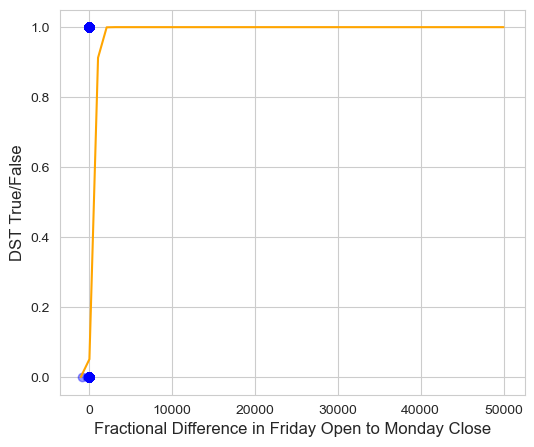

In [68]:
plt.figure(figsize=(6,5))

plt.scatter(consumer_train['diff_fomc'], consumer_train['y'],alpha=0.4,color='b')

plt.plot(np.linspace(-1000,50000), log_reg.predict_proba(np.linspace(-1000,50000).reshape(-1,1))[:,1], color = 'orange')

plt.xlabel("Fractional Difference in Friday Open to Monday Close", fontsize=12)
plt.ylabel("DST True/False", fontsize=12)
plt.show()

In [69]:
log_reg=LogisticRegression()

In [70]:
log_reg.fit(consumer_train[['diff_vol']],consumer_train['y'])

LogisticRegression()

/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


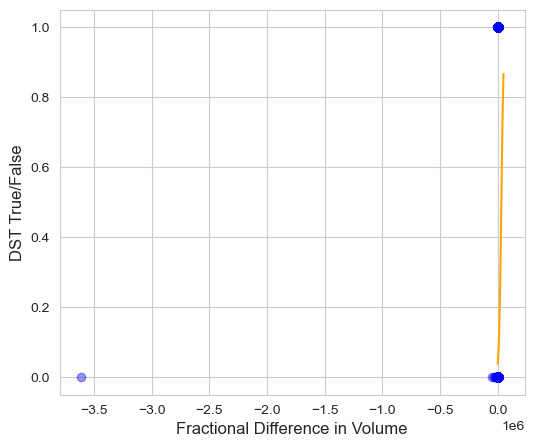

In [72]:
plt.figure(figsize=(6,5))

plt.scatter(consumer_train['diff_vol'], consumer_train['y'],alpha=0.4,color='b')

plt.plot(np.linspace(-1000,50000), log_reg.predict_proba(np.linspace(-1000,50000).reshape(-1,1))[:,1], color = 'orange')

plt.xlabel("Fractional Difference in Volume", fontsize=12)
plt.ylabel("DST True/False", fontsize=12)
plt.show()

# $k$ Nearest Neighbors

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [75]:

## Make your kfold object
n_splits = 5

kfold = KFold(n_splits=n_splits)

In [77]:
## Fill in the range you want to try for k; say from 1 neighbor to 10
ks = range(1,11)

## Make an array to hold the accuracies
k_all_accs = np.zeros((n_splits,len(ks)))

i = 0
for train_index, test_index in kfold.split(consumer_train):
    ## Get the train and holdout sets
    consumer_tt = consumer_train.iloc[train_index]
    consumer_ho = consumer_train.iloc[test_index]
    
    ## Loop through the different ks
    j = 0
    for k in ks:
        ## Make the model object
        knn = Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=k))])
        
        ## Fit the model
        knn.fit(consumer_tt[metrics],consumer_tt['y'])
        
        ## Make your prediction
        pred = knn.predict(consumer_ho[metrics])
        
        ## Record the accuracy on the holdout set
        k_all_accs[i,j] = accuracy_score(consumer_ho.y.values, pred)
        
        j = j + 1
    i = i + 1

In [78]:
consumer_train['y'].value_counts(normalize=True)

y
0    0.957892
1    0.042108
Name: proportion, dtype: float64

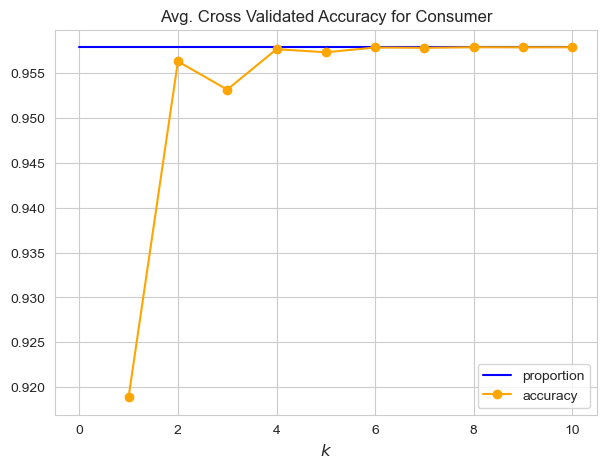

In [80]:
## Plots the accuracies as a function of k
plt.figure(figsize=(7,5))

plt.plot([0,10],[0.957892,0.957892],label='proportion',color='b')

plt.plot(ks, 
         np.mean(k_all_accs, axis=0),
         '-o',color='orange',label='accuracy')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("$k$", fontsize=12)
plt.title("Avg. Cross Validated Accuracy for Consumer", fontsize=12)

plt.legend()
plt.show()

### Random Forest Classification

In [81]:
## import model objects
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from sklearn.metrics import accuracy_score
# from tree_helpers import SkNode, traversable_nodes

In [82]:
tree = DecisionTreeClassifier(
    #max_depth = 10, 
    min_samples_leaf = 5, # minimum number of samples in each leaf, to prevent overfitting
    random_state= 216)

rf = RandomForestClassifier(
    n_estimators = 500, # number of trees in ensemble
    max_depth = 3, # max_depth of each tree
    min_samples_leaf = 5, 
    max_features = 2, 
    bootstrap= True, # sampling with replacement
    max_samples = 300, # number of training samples selected with replacement to build tree
    random_state = 216 # for consistency
    )


et = ExtraTreesClassifier(
    n_estimators = 500, 
    #max_depth = 10, 
    min_samples_leaf = 5, 
    max_features = 2, 
    #bootstrap= True, 
    #max_samples = 500, 
    random_state = 216 
    )

In [83]:
## Fit the models
tree.fit(consumer_train[metrics],consumer_train['y'])
rf.fit(consumer_train[metrics],consumer_train['y'])
et.fit(consumer_train[metrics],consumer_train['y'])

ExtraTreesClassifier(max_features=2, min_samples_leaf=5, n_estimators=500,
                     random_state=216)

In [84]:
accs = [accuracy_score(consumer_test['y'], tree.predict(consumer_test[metrics])),  accuracy_score(consumer_test['y'], rf.predict(consumer_test[metrics])), accuracy_score(consumer_test['y'], et.predict(consumer_test[metrics]))]
pd.DataFrame(accs, index= ['tree', 'rf', 'et'], columns = ['accuracy'])

,accuracy
tree,0.943927
rf,0.957881
et,0.957881


In [88]:
consumer_test['y'].value_counts(normalize=True)

y
0    0.957881
1    0.042119
Name: proportion, dtype: float64

In [85]:
diffs = ['diff_fomc','diff_vol']

In [86]:
## Fit the models
tree.fit(consumer_train[diffs],consumer_train['y'])
rf.fit(consumer_train[diffs],consumer_train['y'])
et.fit(consumer_train[diffs],consumer_train['y'])

ExtraTreesClassifier(max_features=2, min_samples_leaf=5, n_estimators=500,
                     random_state=216)

In [87]:
accs = [accuracy_score(consumer_test['y'], tree.predict(consumer_test[diffs])),  accuracy_score(consumer_test['y'], rf.predict(consumer_test[diffs])), accuracy_score(consumer_test['y'], et.predict(consumer_test[diffs]))]
pd.DataFrame(accs, index= ['tree', 'rf', 'et'], columns = ['accuracy'])

,accuracy
tree,0.953033
rf,0.957881
et,0.957881
